In [36]:
# Read the required libraries
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm

In [66]:
train= pd.read_csv('train.csv')
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [38]:
# This shows that we do not have any missing value
# And aslo we have two columns of non didgit values
# AS we have a csv file the object type is text
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [39]:
train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [40]:
# We have repeated values in color and type that
# shows these two features are categorical ones
train['type'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [41]:
train['color'].value_counts()

white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64

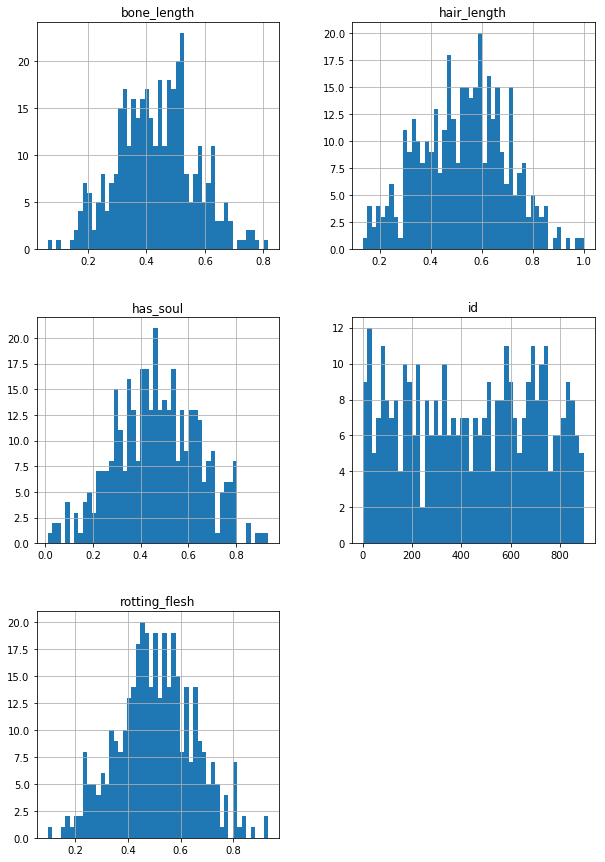

In [42]:
# The following histogram shows that the scale of attributes are almost the same
# so we do not need to scale the features
# Moreover, all of the attributes have normal distribution except id  
train.hist(bins=50, figsize=(10,15));
# Calling show is optional in the jupyter notebook
plt.show()

In [43]:
lookup_Ghots_name = dict(zip(train.id.unique(),train.type.unique()))
print(lookup_Ghots_name)

{0: 'Ghoul', 1: 'Goblin', 2: 'Ghost'}


In [67]:
# Adding label for the categoriacal feature type
train.type = pd.Categorical(train.type)
train['label'] = train.type.cat.codes
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,label
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,1
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin,2
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul,1
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul,1
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost,0


## Creating a test set
### - Here we have been given a test set otherwise we could make it using the following command
### - train_set, test_set = train_test_split(X, test_size=0.2, random_state=42)

In [68]:
# Remove the attribiute 'color' as it is not a digit value 
X_train =train[['bone_length','rotting_flesh','hair_length','has_soul']]
y_train = train['label']
X_train.head()

,bone_length,rotting_flesh,hair_length,has_soul
0,0.354512,0.350839,0.465761,0.781142
1,0.575560,0.425868,0.531401,0.439899
2,0.467875,0.354330,0.811616,0.791225
3,0.776652,0.508723,0.636766,0.884464
4,0.566117,0.875862,0.418594,0.636438


In [46]:
# Reading the test set
test = pd.read_csv('test.csv')
test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
id               529 non-null int64
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


In [48]:
test.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000,529.000000
mean,453.584121,0.425474,0.503637,0.517288,0.464096
std,257.804948,0.136079,0.158552,0.171727,0.179659
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,239.000000,0.329383,0.393987,0.388189,0.338964
50%,445.000000,0.421989,0.510065,0.520220,0.461294
75%,670.000000,0.519024,0.605957,0.644824,0.584448
max,899.000000,1.000000,1.000000,0.999841,1.000000


In [49]:
X_test = test[['bone_length','rotting_flesh','hair_length','has_soul']]

## Data Visualization

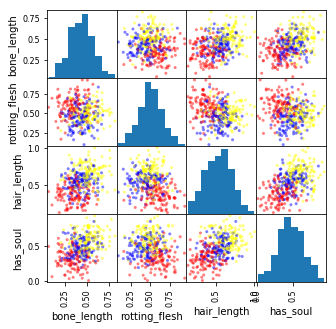

In [50]:
# We make a copy of train set to make sure that we can play with it without harming the training set
X_train = X_train.copy()
colors = ['red','yellow','blue']
cmap=mlp.colors.ListedColormap(colors)
pd.plotting.scatter_matrix(X_train,figsize = (5,5),c= y_train, marker = '.',hist_kwds={'bins':10},cmap=cmap);

In [51]:
corr_matrix = X_train.corr()
print(corr_matrix)

               bone_length  rotting_flesh  hair_length  has_soul
bone_length       1.000000      -0.041716     0.353881  0.381675
rotting_flesh    -0.041716       1.000000    -0.220353 -0.132051
hair_length       0.353881      -0.220353     1.000000  0.474835
has_soul          0.381675      -0.132051     0.474835  1.000000


## Data cleaning 

In [52]:
## Here we do not need to do data cleaning as we do not have any missing values
## Just as a practice I tried it out

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median");
imputer.fit(X_train);

In [18]:
# Feature scalining 
# As the range of features are almost same we do not need
# to do feature scaling here
# Here is somethind that we can do in case we
# needed a feature scaling

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler


# num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
  #                      ('std_scaler', StandardScaler())])

# X_train = num_pipeline.fit_transform(X_train)


## Create classifier object

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

## Train the classifier (fit the estimator) using the training data

In [54]:
knn.fit(X_train,y_train);

## Use the trianed k-NN classifier model to new, previously unseen objects

In [55]:
sample_pridiction=knn.predict([[0.4,0.3,0.7,0.1]])
lookup_Ghots_name[sample_pridiction[0]]

'Ghoul'

In [56]:
sample_prediction = knn.predict([[0.4,0.2,0.5,0.6]])
lookup_Ghots_name[sample_prediction[0]]

'Ghost'

In [57]:
some_data = X_train.iloc[:5]
some_label = y_train.iloc[:5]
some_data_prediction = knn.predict(some_data)
print(some_data_prediction )
print(some_label.values)
[print(lookup_Ghots_name[x]) for x in some_data_prediction];

[1 2 1 1 0]
[1 2 1 1 0]
Goblin
Ghost
Goblin
Goblin
Ghoul


## Evaluation using Cross-Validation

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train,
scoring="neg_mean_squared_error", cv=5)

def display_scores(scores):
    
    print("Scores:",-scores)
    print("Mean:",-scores.mean())
    print("Standard deviation:", scores.std())
    print("Accuracy: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

display_scores(scores)


Scores: [0.52       0.69333333 0.37837838 0.72972973 0.42465753]
Mean: 0.5492197951376034
Standard deviation: 0.14064770977460891
Accuracy: 0.55 (+/- 0.28)


## Plot the decision boundaries of the k-NN classifier

In [59]:
from sklearn import neighbors

def plot_Ghuble_knn(X, y, n_neighbors, weights):
    X_mat = X[['hair_length', 'rotting_flesh']].values
    y_mat = y.values

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='Ghoul')
    patch1 = mpatches.Patch(color='#00FF00', label='Goblin')
    patch2 = mpatches.Patch(color='#0000FF', label='Ghost')
    plt.legend(handles=[patch0, patch1, patch2])


    plt.xlabel('hair_length (cm)')
    plt.ylabel('bone_length (cm)')
    plt.title('KNN with K={}'.format(n_neighbors))

    plt.show()


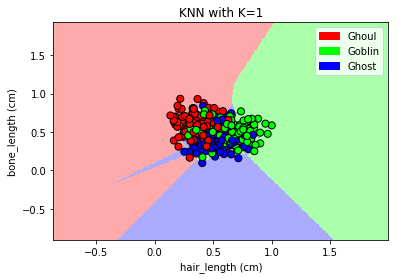

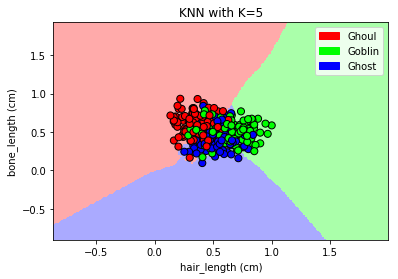

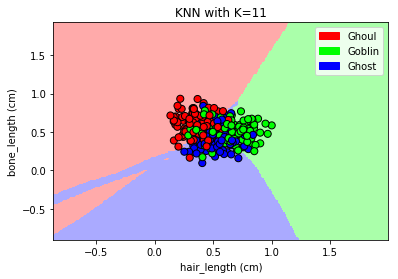

In [27]:
plot_Ghuble_knn(X_train, y_train, 1, 'distance') 
plot_Ghuble_knn(X_train, y_train, 5, 'distance')
plot_Ghuble_knn(X_train, y_train, 11 , 'distance')

## Estimate the accuracy of the classifier on future data, using the test data

In [60]:
# I couldn't estimate this parameter because the labels were not determined for the 
# test set in the kaggle database
knn.score(X_test, y_test)

NameError: name 'y_test' is not defined

## How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

In [61]:
k_range = range(1,20)
scores =[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

NameError: name 'y_test' is not defined

## How sensitive is k-NN classification accuracy to the train/test split proportion?

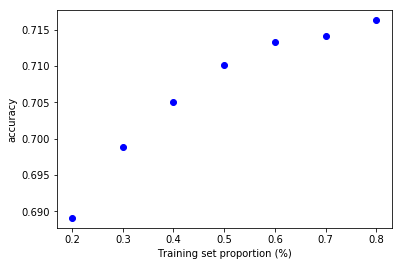

In [72]:
from sklearn.model_selection import train_test_split
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    

    scores = []
    for i in range(1,1000):
        
        X_train2, X_test, y_train2, y_test = train_test_split(X_train, y_train, test_size = 1-s)
        knn.fit(X_train2, y_train2)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training set proportion (%)') 
plt.ylabel('accuracy');